### Exploración tiempos espera

### Carga y Análisis General

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../data/eventos_despegues.csv')
df.columns 

Index(['ICAO', 'ultimo_parado', 'despegue', 'tiempo_espera', 'fecha_despegue',
       'hora_despegue'],
      dtype='object')

In [4]:
df.shape

(911, 6)

In [5]:
df.head()

,ICAO,ultimo_parado,despegue,tiempo_espera,fecha_despegue,hora_despegue
0,34644E,2024-12-05 15:44:24.247,2024-12-05 15:44:48.228,23.981,2024-12-05,15
1,34644E,2024-12-06 06:27:38.836,2024-12-06 06:28:59.316,80.480,2024-12-06,6
2,34644E,2024-12-06 10:50:54.131,2024-12-06 10:56:27.812,333.681,2024-12-06,10
3,3D7061,2024-12-05 13:59:53.147,2024-12-05 14:12:50.907,777.760,2024-12-05,14
4,4400DC,2024-12-05 23:08:41.904,2024-12-05 23:09:05.401,23.497,2024-12-05,23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ICAO            911 non-null    object 
 1   ultimo_parado   911 non-null    object 
 2   despegue        911 non-null    object 
 3   tiempo_espera   911 non-null    float64
 4   fecha_despegue  911 non-null    object 
 5   hora_despegue   911 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 42.8+ KB


Convertimos las columnas al tipo fecha

In [7]:
df['ultimo_parado'] = pd.to_datetime(df['ultimo_parado'])
df['despegue'] = pd.to_datetime(df['despegue'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ICAO            911 non-null    object        
 1   ultimo_parado   911 non-null    datetime64[ns]
 2   despegue        911 non-null    datetime64[ns]
 3   tiempo_espera   911 non-null    float64       
 4   fecha_despegue  911 non-null    object        
 5   hora_despegue   911 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 42.8+ KB


In [9]:
df['tiempo_espera'].describe()

count      911.000000
mean       411.290880
std       2714.242938
min          0.000000
25%         23.078000
50%         31.521000
75%        387.545500
max      64956.712000
Name: tiempo_espera, dtype: float64

**El máximo** es bastante sospechoso, tendremos que ver que ha pasado

**La mediana (50 %)** también parece decir cosas extrañas, que para la mitad de los datos los tiempos de espera no pasan del medio minuto

#### Despegues por horas

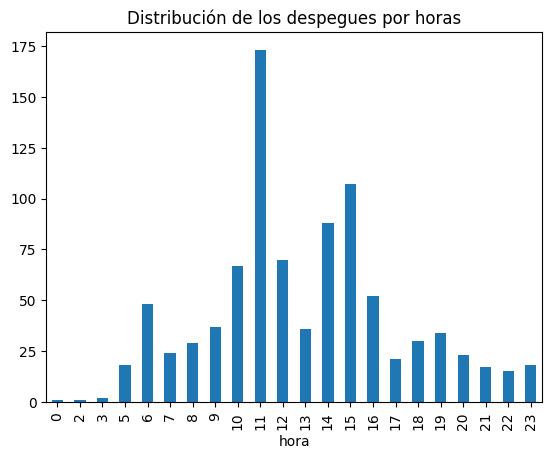

In [10]:
df.hora_despegue.value_counts().sort_index().plot(kind="bar")
plt.title('Distribución de los despegues por horas')
plt.xlabel('hora');

Vemos varias cosas:
- Hay muy pocos datos entre **las 0 y las 4 de la mañana**
- El mayor número de despegues ocurre a las 11 de la mañana

In [11]:
df.despegue.dt.day_of_week.value_counts()

despegue
4    513
3    398
Name: count, dtype: int64

#### Despegues por días de la semana

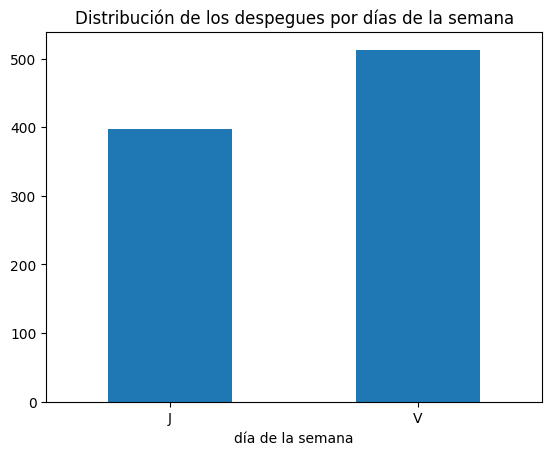

In [12]:
dias_semana = df.despegue.dt.day_of_week.value_counts().sort_index()
dias_semana.index = dias_semana.index.map(lambda x: ['L', 'M', 'X', 'J', 'V', 'S', 'D'][x])
dias_semana.plot(kind="bar")
plt.title('Distribución de los despegues por días de la semana')
plt.xticks(rotation=0)
plt.xlabel('día de la semana');

En este caso las distribución de vuelos parece ser uniforme para los días de las semana, esto es un punto a favor para la consistencias los datos extraídos

**Unstacked bar plot**

### Histograma

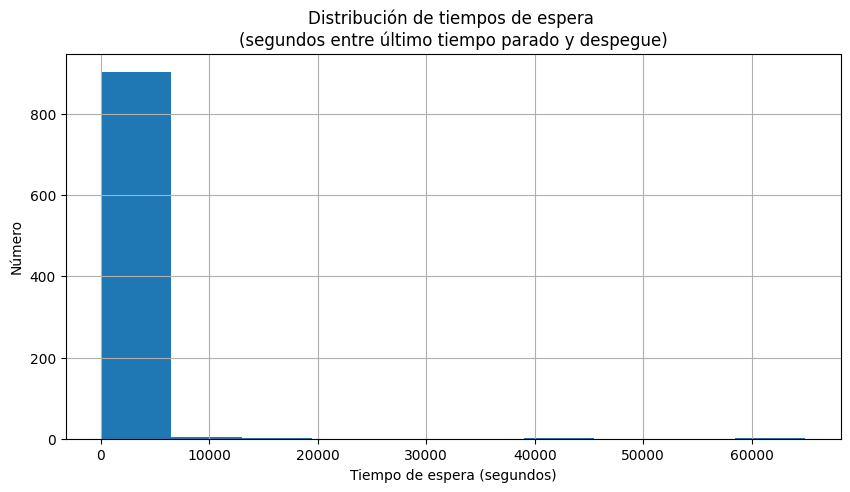

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df.tiempo_espera.hist(ax=ax);

#### Cogemos solo vuelos que se esperan menos de 30 minutos y más de 1

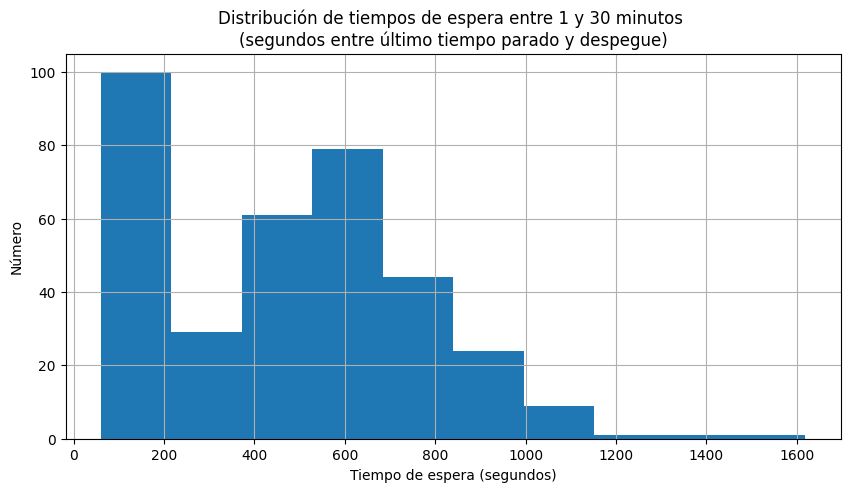

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera entre 1 y 30 minutos \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')

umbral_low, umbral_high = 1 * 60, 30 * 60
df_entre_5_20 = df[(df.tiempo_espera > umbral_low) & (df.tiempo_espera < umbral_high)]
df_entre_5_20.tiempo_espera.hist(ax=ax);

### Por avión

In [15]:
df['ICAO'].value_counts()

ICAO
345385    91
34604B     6
3452C7     6
344213     6
34750F     6
          ..
347387     1
344346     1
738055     1
4D2223     1
4CA708     1
Name: count, Length: 465, dtype: int64

**Bastante raro** que el avión `345385` haya hecho 99 despegues, vamos a verlo

In [16]:
df_345385 = df[df['ICAO'] == "345385"]
df_345385.head(10)

,ICAO,ultimo_parado,despegue,tiempo_espera,fecha_despegue,hora_despegue
27,345385,2024-12-06 07:17:56.355,2024-12-06 07:23:23.023,326.668,2024-12-06,7
28,345385,2024-12-06 10:58:06.479,2024-12-06 10:58:07.202,0.723,2024-12-06,10
29,345385,2024-12-06 10:58:11.673,2024-12-06 10:58:11.673,0.000,2024-12-06,10
30,345385,2024-12-06 10:58:13.809,2024-12-06 10:58:13.809,0.000,2024-12-06,10
31,345385,2024-12-06 10:58:16.475,2024-12-06 10:58:16.927,0.452,2024-12-06,10
32,345385,2024-12-06 10:58:39.521,2024-12-06 10:58:40.069,0.548,2024-12-06,10
33,345385,2024-12-06 10:59:05.242,2024-12-06 10:59:05.761,0.519,2024-12-06,10
34,345385,2024-12-06 10:59:12.379,2024-12-06 10:59:12.968,0.589,2024-12-06,10
35,345385,2024-12-06 10:59:16.162,2024-12-06 10:59:16.707,0.545,2024-12-06,10
36,345385,2024-12-06 10:59:19.647,2024-12-06 10:59:19.763,0.116,2024-12-06,10


Parece ser que hay algunos despegues que **tardan 0 segundos**, no tiene sentido ver esos datos.

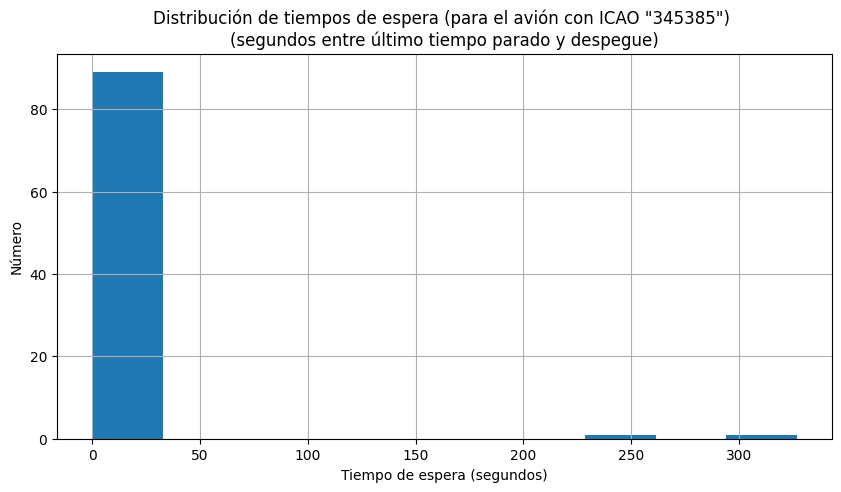

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera (para el avión con ICAO "345385") \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df_345385.tiempo_espera.hist(ax=ax);

Más del 80 de los despegues son en menos de 1 minuto, hay que ver que ocurre para tiempos menores de 50 segundos solo (hacemos un zoom en el histograma anterior)

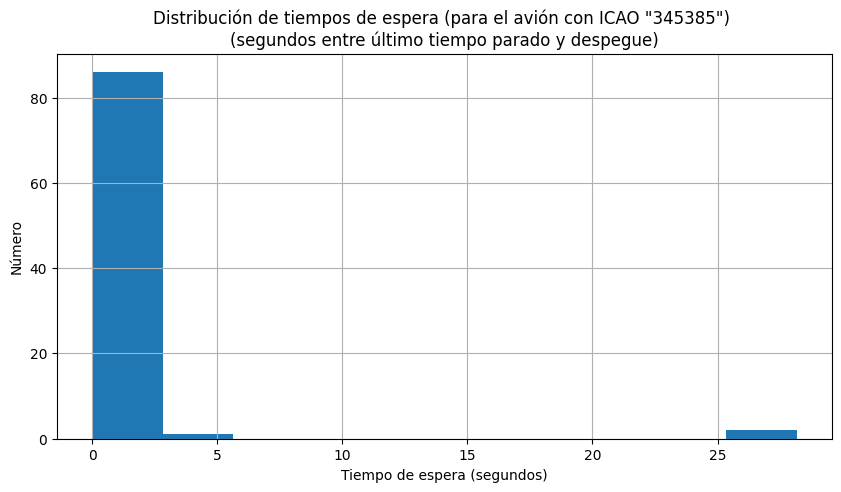

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera (para el avión con ICAO "345385") \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df_345385[df_345385.tiempo_espera < 50].tiempo_espera.hist(ax=ax);

Más del 80 de los despegues son en menos de 5 segundos, seguro que se trata de un error.

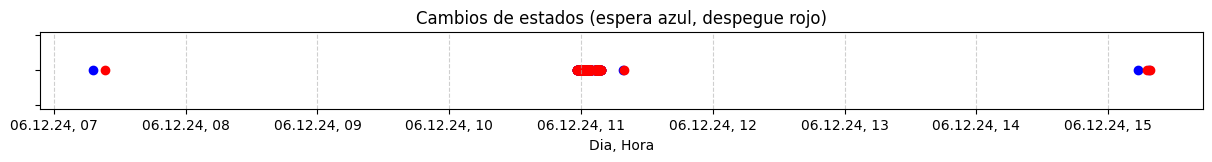

In [19]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(1,1, figsize=(15, 1))

axs.scatter(df_345385.ultimo_parado, [1] * df_345385.shape[0], marker="o", color="blue")
axs.scatter(df_345385.despegue, [1] * df_345385.shape[0], marker="o", color="red")

axs.set_title("Cambios de estados (espera azul, despegue rojo)")
axs.grid(axis='x', linestyle='--', alpha=0.6)

axs.set_yticklabels([])
axs.set_xlabel("Dia, Hora")
myFmt = mdates.DateFormatter('%d.%m.%y, %H')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
axs.xaxis.set_major_formatter(myFmt);

Todos los datos son para **del 6 de DICIEMBRE**

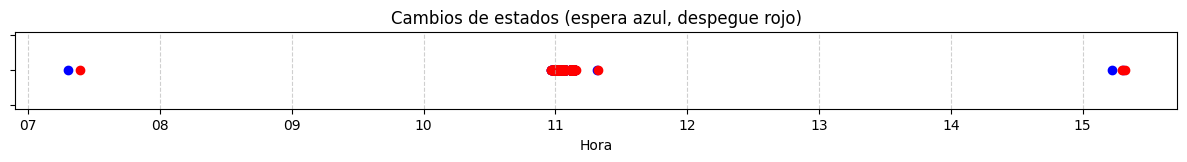

In [20]:
fig, axs = plt.subplots(1,1, figsize=(15, 1))

axs.scatter(df_345385.ultimo_parado, [1] * df_345385.shape[0], marker="o", color="blue")
axs.scatter(df_345385.despegue, [1] * df_345385.shape[0], marker="o", color="red")

axs.set_title("Cambios de estados (espera azul, despegue rojo)")
axs.grid(axis='x', linestyle='--', alpha=0.6)

axs.set_yticklabels([])
axs.set_xlabel("Hora")
myFmt = mdates.DateFormatter('%H')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
axs.xaxis.set_major_formatter(myFmt);

In [21]:
df[df.tiempo_espera < 1]

,ICAO,ultimo_parado,despegue,tiempo_espera,fecha_despegue,hora_despegue
28,345385,2024-12-06 10:58:06.479,2024-12-06 10:58:07.202,0.723,2024-12-06,10
29,345385,2024-12-06 10:58:11.673,2024-12-06 10:58:11.673,0.000,2024-12-06,10
30,345385,2024-12-06 10:58:13.809,2024-12-06 10:58:13.809,0.000,2024-12-06,10
31,345385,2024-12-06 10:58:16.475,2024-12-06 10:58:16.927,0.452,2024-12-06,10
32,345385,2024-12-06 10:58:39.521,2024-12-06 10:58:40.069,0.548,2024-12-06,10
...,...,...,...,...,...,...
110,345385,2024-12-06 11:08:41.293,2024-12-06 11:08:42.114,0.821,2024-12-06,11
111,345385,2024-12-06 11:08:48.832,2024-12-06 11:08:49.019,0.187,2024-12-06,11
112,345385,2024-12-06 11:08:58.981,2024-12-06 11:08:58.981,0.000,2024-12-06,11
113,345385,2024-12-06 11:09:03.436,2024-12-06 11:09:04.148,0.712,2024-12-06,11


### Boxplot

Cogemos los 10 aviones con mas filas sobre tiempos de espera

In [22]:
top_10_most_frequent = df.ICAO.value_counts()[:10]
top_10_most_frequent

ICAO
345385    91
34604B     6
3452C7     6
344213     6
34750F     6
345597     5
343694     5
34604C     5
345250     5
34538E     5
Name: count, dtype: int64

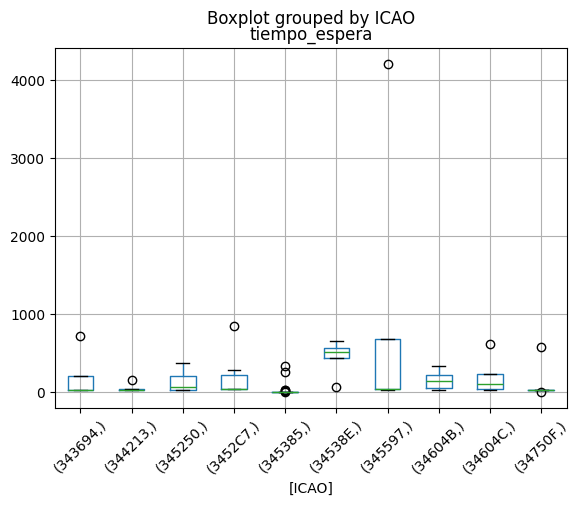

In [23]:
df[df.ICAO.isin(top_10_most_frequent.index)].boxplot(column=['tiempo_espera'], by=['ICAO'])
plt.xticks(rotation=45);

No es casi nada informativo por los outliers, vamos a realizar una selección de los datos, como hacíamos en los histogramas

**Decartamos filas con tiempo inferior a 1 minuto y superiores a 30 minutos**

Cogemos los 10 aviones con mas filas sobre tiempos de espera

In [24]:
df_from_1_min = df[(df.tiempo_espera > 60) & (df.tiempo_espera < 1800)]
top_10_most_frequent = df_from_1_min.ICAO.value_counts()[:10]
top_10_most_frequent

ICAO
34538E    5
345687    4
34604B    4
3453C1    3
3423C4    3
347312    3
344648    3
343141    3
342211    3
3445D4    3
Name: count, dtype: int64

En este caso lo bueno es que tienen un número similar de filas

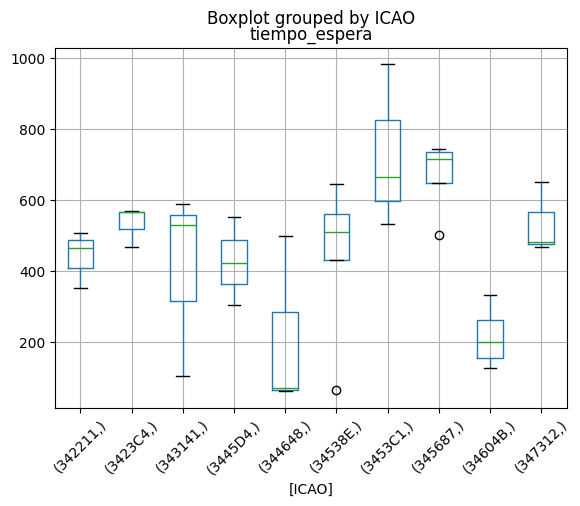

In [25]:
df_from_1_min[df_from_1_min.ICAO.isin(top_10_most_frequent.index)].boxplot(column=['tiempo_espera'], by=['ICAO'])
plt.xticks(rotation=45);

En este caso se pueden sacar algunos resultados.

Las medianas de los tiempos son muy diferentes, en un caso siendo 3 minutos (200 segundos) y en otros alrededor de 7 minutos (450 segundos)

In [26]:
import seaborn as sns

In [27]:
df['tiempo_espera'].describe()

count      911.000000
mean       411.290880
std       2714.242938
min          0.000000
25%         23.078000
50%         31.521000
75%        387.545500
max      64956.712000
Name: tiempo_espera, dtype: float64

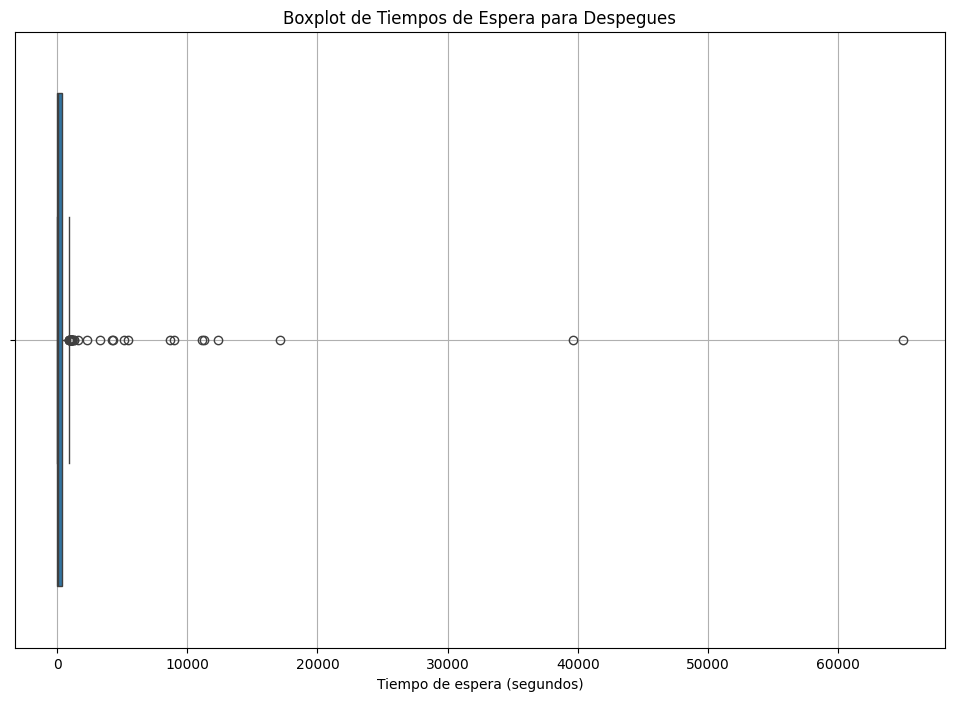

In [28]:
plt.figure(figsize=(12, 8))  # Tamaño de la figura
sns.boxplot(x=df['tiempo_espera'])
plt.title('Boxplot de Tiempos de Espera para Despegues')  # Título del gráfico
plt.xlabel('Tiempo de espera (segundos)')  # Etiqueta del eje X
plt.grid(True)  # Añadir una cuadrícula para mejor visualización
plt.show()

In [82]:
df2 = pd.read_csv('../../data/ex1/eventos_espera_semana.csv')
df2.columns 

Index(['ICAO', 'ultimo_parado', 'despegue', 'tiempo_espera', 'aircraft_type',
       'fecha_despegue', 'hora_despegue'],
      dtype='object')

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4035 entries, 0 to 4034
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ICAO            4035 non-null   object 
 1   ultimo_parado   4035 non-null   object 
 2   despegue        4035 non-null   object 
 3   tiempo_espera   4035 non-null   float64
 4   aircraft_type   4035 non-null   object 
 5   fecha_despegue  4035 non-null   object 
 6   hora_despegue   4035 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 220.8+ KB


In [84]:
df2['ultimo_parado'] = pd.to_datetime(df2['ultimo_parado'])
df2['despegue'] = pd.to_datetime(df2['despegue'])
df2['fecha_despegue'] = pd.to_datetime(df2['fecha_despegue'])

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4035 entries, 0 to 4034
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ICAO            4035 non-null   object        
 1   ultimo_parado   4035 non-null   datetime64[ns]
 2   despegue        4035 non-null   datetime64[ns]
 3   tiempo_espera   4035 non-null   float64       
 4   aircraft_type   4035 non-null   object        
 5   fecha_despegue  4035 non-null   datetime64[ns]
 6   hora_despegue   4035 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(1), object(2)
memory usage: 220.8+ KB


In [86]:
df2['hora_despegue'] = df2['hora_despegue'].astype(int)

In [87]:
print(df2['aircraft_type'].unique())

['High vortex aircraft' 'Heavy (larger than 136000 kg)' 'Rotorcraft']


In [88]:
print(df2.groupby('aircraft_type')['tiempo_espera'].max())

aircraft_type
Heavy (larger than 136000 kg)     25348.551
High vortex aircraft             518771.655
Rotorcraft                       504118.553
Name: tiempo_espera, dtype: float64


## Tipos de Aeronaves

### High vortex aircraft
- **Descripción**: Aeronaves que generan vórtices de estela significativos debido a su gran envergadura y superficie alar.
- **Ejemplos**:
  - **Boeing 777**: Utilizado para vuelos comerciales de larga distancia.
  - **Airbus A350**: Utilizado en rutas intercontinentales.

### Heavy (larger than 136000 kg)
- **Descripción**: Aviones con un peso de despegue superior a 136,000 kg, generalmente grandes aviones de pasajeros de cuerpo ancho o aviones de carga.
- **Ejemplos**:
  - **Boeing 747**: Utilizado tanto para pasajeros como para carga, conocido por su tamaño y capacidad.
  - **Airbus A380**: El avión de pasajeros más grande del mundo, usado en rutas internacionales.

### Rotorcraft
- **Descripción**: Aeronaves que utilizan rotores para generar sustentación, como helicópteros y girocópteros.
- **Ejemplos**:
  - **Sikorsky UH-60 Black Hawk**: Helicóptero militar multifunción.
  - **Eurocopter EC135**: Helicóptero ligero utilizado en servicios médicos de emergencia y transporte corporativo.


In [73]:
print(df2["aircraft_type"].value_counts())

aircraft_type
High vortex aircraft             3608
Heavy (larger than 136000 kg)     379
Rotorcraft                         48
Name: count, dtype: int64


## Boxplot por tipo de avión

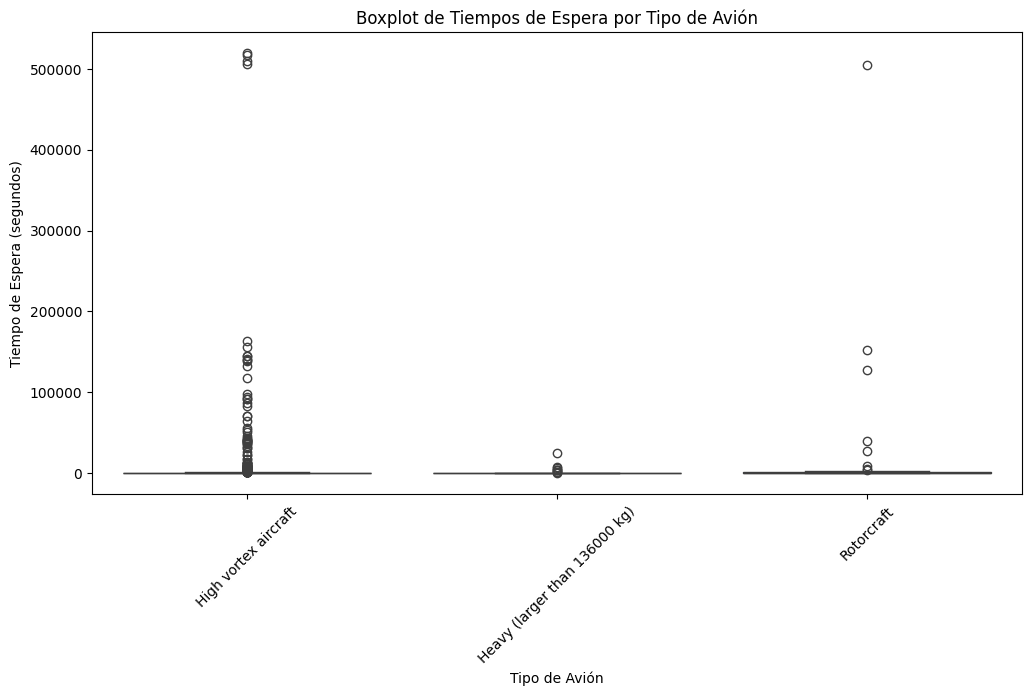

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='aircraft_type', y='tiempo_espera', data=df2)
plt.title('Boxplot de Tiempos de Espera por Tipo de Avión')
plt.xlabel('Tipo de Avión')
plt.ylabel('Tiempo de Espera (segundos)')
plt.xticks(rotation=45)
plt.show()

Podemos ver que los aviones de pasajeros son mucho más comunes que otras vehículos como los  helicopteros. Además podemos apreciar que estas aeronaves que usan rotores no simpre son muy prioritarios, por lo que tienen más retrasos y más largos que los vuelos normales. Por otro lado, apreciamos que los aviones 'High Vortex Aircraft' son los más comunes por mucho. Esto puede deberse a que estos son tanto aviones de pasajeros que hacen vuelos más largos como aviones de carga. Además esto explicaría que en esta categoría tengamos vuelos con tantos tiempos de espera comparados con los 'Heavy' que representarían los vuelos más cortos y de pasajeros, ya que los vuelos de suelen tener menos prioridad y tiene tiempos de espera más largos. Además al ser vuelos que generan un gran vórtice de estela debido a su tamaño son más dificiles de coordinar que el resto. Por último resulta ver que tanto en High Vortex como en Rotorcraft tenemos varios casos con tiempos de espera de 500000, es decir, casi un año. Lo que resulta bastante raro y parece ser un error en los datos

## Mapa  de calor (días/horas)

C:\Users\jesus\AppData\Local\Temp\ipykernel_11304\1160855233.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df2.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


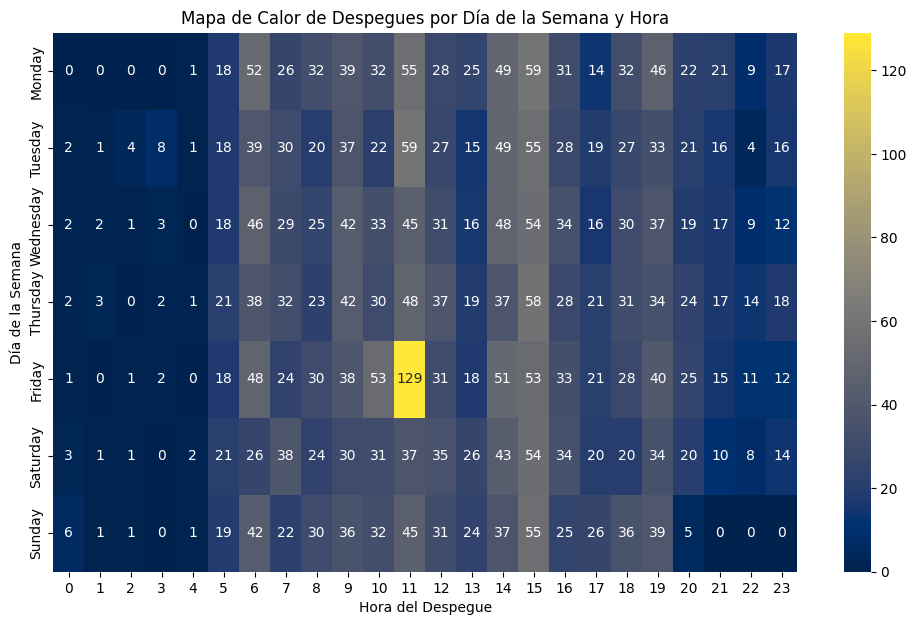

In [81]:
# Agregar columna de día de la semana
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df2['dia_semana'] = pd.Categorical(df2['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)

# Crear tabla pivot
pivot_table = df2.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)

# Mapa de calor de despegues por día de la semana y hora
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="cividis")
plt.title('Mapa de Calor de Despegues por Día de la Semana y Hora')
plt.xlabel('Hora del Despegue')
plt.ylabel('Día de la Semana')
plt.show()


## Mapa de calor (tipo de avión, días, horas)

C:\Users\jesus\AppData\Local\Temp\ipykernel_11304\3051209002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)
C:\Users\jesus\AppData\Local\Temp\ipykernel_11304\3051209002.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


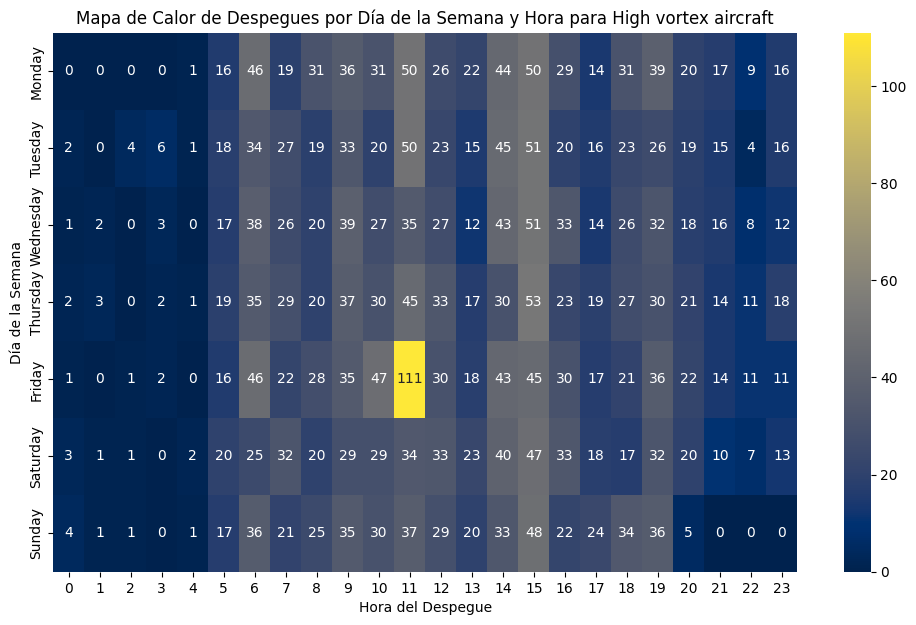

C:\Users\jesus\AppData\Local\Temp\ipykernel_11304\3051209002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)
C:\Users\jesus\AppData\Local\Temp\ipykernel_11304\3051209002.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


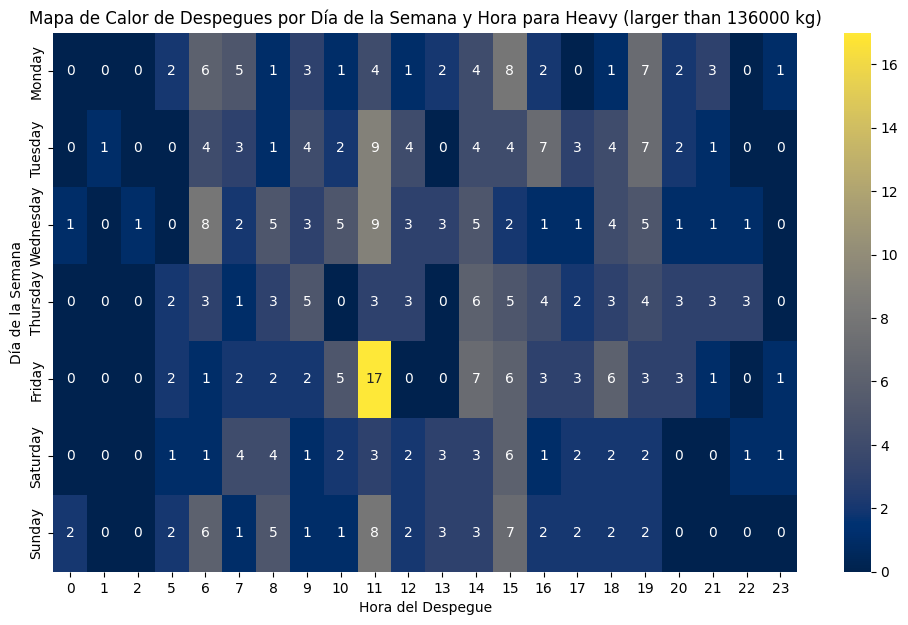

C:\Users\jesus\AppData\Local\Temp\ipykernel_11304\3051209002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)
C:\Users\jesus\AppData\Local\Temp\ipykernel_11304\3051209002.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


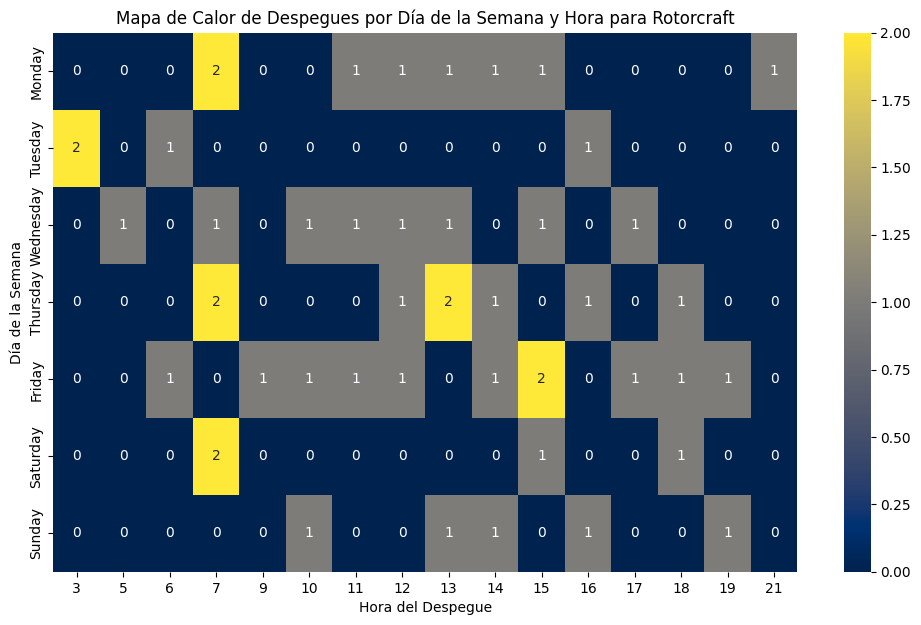

In [80]:
# Obtener los tipos de avión únicos
tipos_de_avion = df2['aircraft_type'].unique()

for tipo in tipos_de_avion:
    df_filtrado = df2[df2['aircraft_type'] == tipo]
    df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)

    # Crear la tabla pivotante
    pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)

    # Generar el mapa de calor
    plt.figure(figsize=(12, 7))
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="cividis")
    plt.title(f'Mapa de Calor de Despegues por Día de la Semana y Hora para {tipo}')
    plt.xlabel('Hora del Despegue')
    plt.ylabel('Día de la Semana')
    plt.show()

Podemos ver que tanto 'High Vortex Aircraft' como 'Heavy' siguen más o menos la misma estructura, destacando el viernes a las 11 de la mañana como el momento en el que más vuelos salen en ambos. Lo cual tiene sentido ya que es cuando la gente suele irse de viaje para aprovechar el viernes y el fin de semana. Por otro lado, las aeronaves 'Rotorcraft' no parecen seguir una estructura clara: esto puede ser debido a que ser vehiculos con usos mucho más limitados, son utilizados cuando son requeridos, lo cual no depende de ningún patrón